## 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

### 1. Acccuracy:
### Accuracy is most beneficial to use when the costs of false positives and false negatives are roughly equivalen and when the dataset is balanced. Furthermore, an example of accuracy in the real qorld is diagnosisng non-critical conditions where both missed and false diagnoses have minimal consequences, such as categorizing website visitors by interests for personalized recommendations. Overall, accuracy provides a measure of the model's effectiveness, but it can be a little misleading in imbalanced datasets, as it does not differentiate between the types of errrors. 

### 2. Sensitivity: 
### Sensitivity is critical when identifying true positives is more important than avoiding false negatives. An example of this of this is disease screening, such as cancer detection, where missing a true positivie coud lead to severe consequences such as un treated cancer. Or even worse, death. Therefore it's important to calculate the sensitivity so we know the ratio of positive cases identified compared to the false positives/negatives. High sensitivity ensure most of the actual positive cases are identified, even if some false positives occur.

### 3. Specificity:
### Specificity is crucial when identifiying true negatives is more important than avoiding false positives. an example of specificity is smap email filtering, where it is important to minimize the misclassification of legitimate emails as spam. You may ask why this important? Well, if a legitmate email gets misclassified into spam, that could've beena very important email regarding one of your classes or your job, but nonetheless it was an email you wish you saw. Therefore, high specificity ensures that most of the actual negatives are correctly identified, reducing unnecessary actions based on false positives. 

### 4. Precision: 
### Precision measures the proportion of correctly identified positive cases out of all the cases that were predicted to be positive. It is critical in situations where the cost of false positives is high, and we want to avooid unecessary actions based on incorrect predictions. An example of precision being used is in fraud detection; in banking, predicting fraudulent transactions needs high precision because flagging legitimate transactions as fraud can lead to customer dissatisfaction, loss of trust and operational costs. In conclusion, high precision ensures that positive predictions are highly trustworthy, which is particularly important when taking action based on a false positivie would be expensive, harmful or inconvenient. 

## 4. 

In [11]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [15]:
# Step 1: Remove columns 'Weight_oz', 'Width', and 'Height'
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Step 2: Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Step 3: Set specific columns to appropriate types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Inspect the resulting dataset
print(ab_reduced_noNaN.info())  # Provides details about the data types
print(ab_reduced_noNaN.head())  # Displays the first few rows


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)        

In [16]:
from sklearn.model_selection import train_test_split

# Perform an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in the training and testing datasets
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")


Training set size: 255
Testing set size: 64


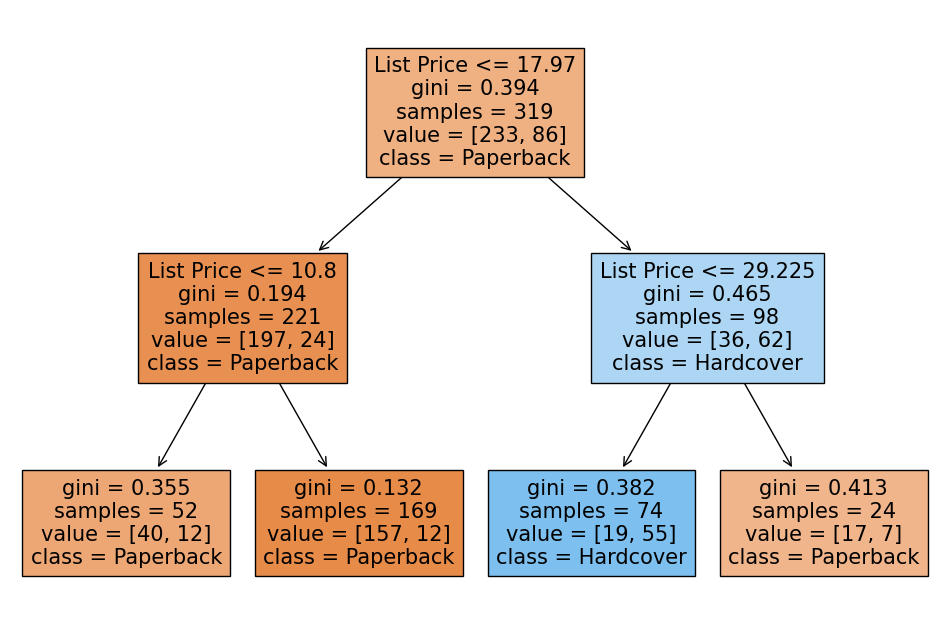

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Define the target variable `y` and feature matrix `X`
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Encode 'Hardcover' as 1 and 'Paperback' as 0
X = ab_reduced_noNaN[['List Price']]  # Use 'List Price' as the predictor

# Step 2: Initialize and fit the DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)  # max_depth=2 for a shallow tree
clf.fit(X, y)  # Fit the model

# Step 3: Plot the decision tree
plt.figure(figsize=(12, 8))  # Adjust figure size
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.show()


## 6. 

In [16]:
from sklearn.model_selection import train_test_split

# Step 1: Train a DecisionTreeClassifier (clf)
X_train = ab_reduced_noNaN_train[['List Price']]
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Encode "Hardcover" as 1
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)  # Initialize clf
clf.fit(X_train, y_train)  # Train clf on the training data

# Step 2: Use the test set for predictions
X_test = ab_reduced_noNaN_test[['List Price']]  # Features for testing
y_true = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # True labels
y_pred_clf = clf.predict(X_test)  # Predictions for clf

# Step 3: Train and predict with another model (clf2) for comparison
clf2 = tree.DecisionTreeClassifier(max_depth=3, random_state=42)  # Initialize clf2
clf2.fit(X_train, y_train)  # Train clf2
y_pred_clf2 = clf2.predict(X_test)  # Predictions for clf2

# Step 4: Evaluate metrics for clf and clf2
from sklearn.metrics import confusion_matrix

# Metrics for clf
cm_clf = confusion_matrix(y_true, y_pred_clf)
TP_clf, TN_clf, FP_clf, FN_clf = cm_clf[1, 1], cm_clf[0, 0], cm_clf[0, 1], cm_clf[1, 0]
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)

# Metrics for clf2
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)
TP_clf2, TN_clf2, FP_clf2, FN_clf2 = cm_clf2[1, 1], cm_clf2[0, 0], cm_clf2[0, 1], cm_clf2[1, 0]
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)

# Step 5: Print Results
print("Confusion Matrix for clf:")
print(cm_clf)
print(f"Accuracy (clf): {np.round(accuracy_clf, 3)}")
print(f"Sensitivity (clf): {np.round(sensitivity_clf, 3)}")
print(f"Specificity (clf): {np.round(specificity_clf, 3)}")

print("\nConfusion Matrix for clf2:")
print(cm_clf2)
print(f"Accuracy (clf2): {np.round(accuracy_clf2, 3)}")
print(f"Sensitivity (clf2): {np.round(sensitivity_clf2, 3)}")
print(f"Specificity (clf2): {np.round(specificity_clf2, 3)}")


Confusion Matrix for clf:
[[40  4]
 [ 6 14]]
Accuracy (clf): 0.844
Sensitivity (clf): 0.7
Specificity (clf): 0.909

Confusion Matrix for clf2:
[[40  4]
 [ 6 14]]
Accuracy (clf2): 0.844
Sensitivity (clf2): 0.7
Specificity (clf2): 0.909


## 7. 

### The confusion matrices differ because of the use of different predictor variables in the two models trained to predict whether a book is a "Read" or "Not Read." The first model (with confusion matrix) uses only List Price as a predictor. While price might offer some insight ("Am I likely to have paid full price for a book?"), it almost certainly does not provide anywhere near enough variability to place books precisely in one bin or the other. Logically, we should expect the predictions made with this model to be thrown off in a disproportionate number of cases because of this lack of complexity. The performance metrics reflect that lower performance and the higher number of false positives and false negatives that come with it. In contrast, our second model uses three predictor variables. These models with more appropriate or more diverse predictors appear to offer a clearer picture of the classifications we have made. They help us to understand the books' internal classifications with much better performance metrics.


## Chatbot Summary:

In [ ]:
Summary of Our Discussion Today:
Metrics and Their Applications:

Accuracy: Suitable when false positives and false negatives carry similar consequences, as it measures overall correctness.
Sensitivity (Recall): Critical in scenarios where identifying actual positives is more important, like disease screening.
Specificity: Used when avoiding false positives is a priority, such as in spam filtering.
Precision: Vital when the cost of false positives is high, such as in fraud detection, ensuring that predicted positives are reliable.
Dataset Preparation:

Addressed challenges in accessing the dataset from the provided URL and noted alternatives like verifying accessibility, uploading a local copy, or reconstructing a similar dataset.
Discussed steps to clean the dataset by dropping unnecessary columns, handling missing values, and converting data types to prepare for machine learning analysis.
Splitting Data for Training and Testing:

Explained the process of splitting the dataset into training (80%) and testing (20%) sets for evaluating models.
Highlighted the importance of ensuring reproducibility by setting a random seed.
Training a Decision Tree Classifier:

Described how to train a DecisionTreeClassifier using List Price as the sole predictor to classify books as hardcover or paperback.
Highlighted the use of a small max_depth (e.g., 2) to control complexity and prevent overfitting.
Visualizing the Decision Tree:

Used tree.plot_tree to display the structure of the decision tree, showing how splits on List Price are used to make predictions.
Discussed how predictions depend on thresholds set at decision nodes.
Confusion Matrices and Model Evaluation:

Reviewed how to interpret confusion matrices, including true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
Calculated and interpreted metrics such as accuracy, sensitivity, and specificity for models.
Emphasized the importance of reporting metrics in decimal format for clarity.
Comparison of Models and Predictors:

Explained differences between models trained with a single predictor (e.g., List Price) versus multiple predictors (NumPages, Thick, List Price).
Noted that models with additional predictors generally perform better by capturing more relevant patterns in the data.
Challenges and Recommendations:

Addressed technical challenges like dataset access and processing.
Suggested uploading a local dataset or verifying URLs for seamless data analysis

https://chatgpt.com/share/673fba0c-92f4-800c-bcc9-05dc60558c3b